In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load the dataset
df = pd.read_csv('/content/global_co2.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         260 non-null    int64  
 1   Total        260 non-null    int64  
 2   Gas Fuel     260 non-null    int64  
 3   Liquid Fuel  260 non-null    int64  
 4   Solid Fuel   260 non-null    int64  
 5   Cement       260 non-null    int64  
 6   Gas Flaring  260 non-null    int64  
 7   Per Capita   61 non-null     float64
dtypes: float64(1), int64(7)
memory usage: 16.4 KB


In [4]:
# Fill missing 'Per Capita' values with the mean of the available values
df['Per Capita'].fillna(df['Per Capita'].mean(), inplace=True)
df

,Year,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
0,1751,3,0,0,3,0,0,1.054754
1,1752,3,0,0,3,0,0,1.054754
2,1753,3,0,0,3,0,0,1.054754
3,1754,3,0,0,3,0,0,1.054754
4,1755,3,0,0,3,0,0,1.054754
...,...,...,...,...,...,...,...,...
255,2006,8370,1525,3089,3339,356,61,1.270000
256,2007,8566,1572,3081,3464,382,68,1.280000
257,2008,8783,1631,3122,3571,388,71,1.300000
258,2009,8740,1585,3056,3620,413,66,1.280000


In [5]:
df['Per Capita'].describe()

,Per Capita
count,260.000000
mean,1.054754
std,0.085977
min,0.640000
25%,1.054754
50%,1.054754
75%,1.054754
max,1.330000


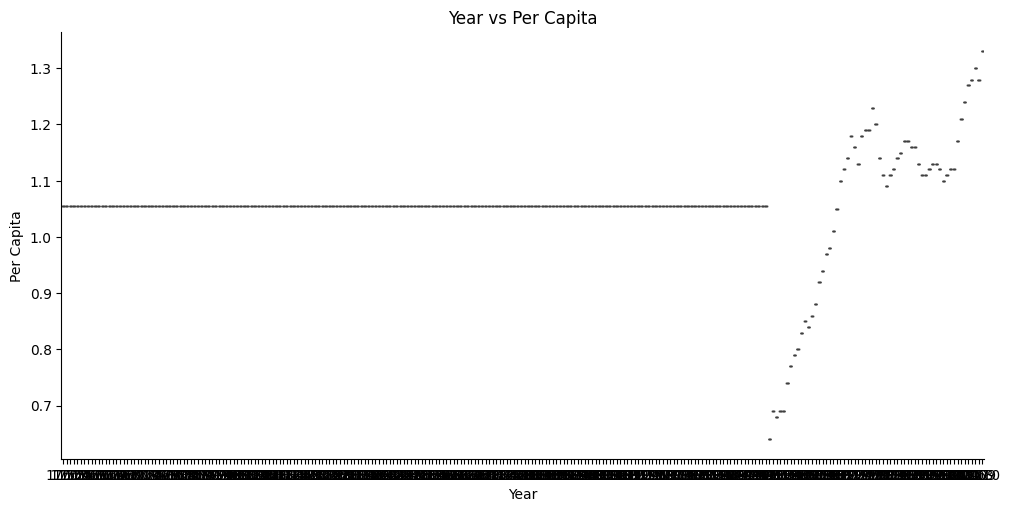

In [6]:
import seaborn as sns

sns.catplot(x= "Year", y = "Per Capita", data =df, kind = "box", aspect = 2)
plt.title("Year vs Per Capita")
plt.show()

In [7]:
x = df.iloc[: , :1].values  #rows, columns
y = df.iloc[: , -1].values

Linear regression

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.25, random_state=1)

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

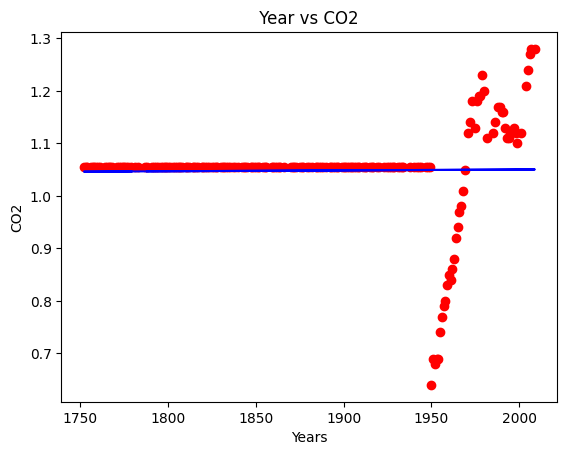

In [10]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title(' Year vs CO2 ')
plt.xlabel('Years')
plt.ylabel('CO2')
plt.show()

In [11]:
input= 8  #0-15
year= int(x_test[input])
print('test year: ',year)
print('predict: ',regressor.predict([[year]]))
print('val: ',y_test[input])
from sklearn.metrics import r2_score
y_pred = regressor.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2 * 100, "%")

test year:  1878
predict:  [1.0482718]
val:  1.0547540983606558
R-squared: -22.322627131174634 %


<ipython-input-11-c92d449cd6f0>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  year= int(x_test[input])


In [13]:
print('predict 2010: ',regressor.predict([[2010]]))
print('predict 2012: ',regressor.predict([[2012]]))
print('predict 2014: ',regressor.predict([[2014]]))

predict 2010:  [1.05043547]
predict 2012:  [1.05046825]
predict 2014:  [1.05050103]


Polynomial regression

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(x)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
X_poly

array([[1.00000000e+00, 1.75100000e+03, 3.06600100e+06, 5.36856775e+09,
        9.40036213e+12],
       [1.00000000e+00, 1.75200000e+03, 3.06950400e+06, 5.37777101e+09,
        9.42185481e+12],
       [1.00000000e+00, 1.75300000e+03, 3.07300900e+06, 5.38698478e+09,
        9.44338431e+12],
       ...,
       [1.00000000e+00, 2.00800000e+03, 4.03206400e+06, 8.09638451e+09,
        1.62575401e+13],
       [1.00000000e+00, 2.00900000e+03, 4.03608100e+06, 8.10848673e+09,
        1.62899498e+13],
       [1.00000000e+00, 2.01000000e+03, 4.04010000e+06, 8.12060100e+09,
        1.63224080e+13]])

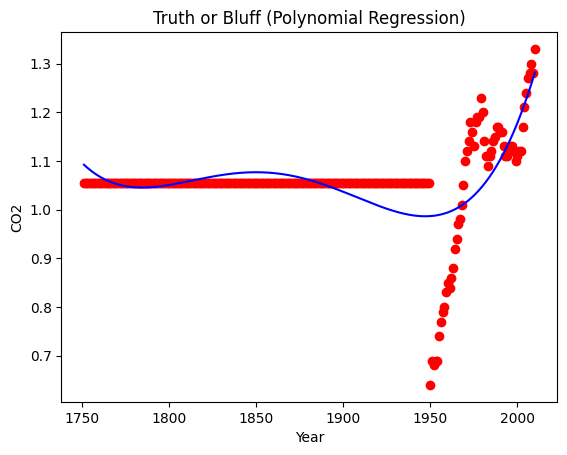

In [15]:
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)),color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Year')
plt.ylabel('CO2')
plt.show()

In [16]:
input= 7  #0-15
year= int(x_test[input])
print('test year: ',year)
print('predict :',lin_reg_2.predict(poly_reg.fit_transform([[year]])))
print('test val: ',y_test[input])
y_pred = lin_reg_2.predict(poly_reg.fit_transform(x_test))
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2 * 100, "%")

test year:  2008
predict : [1.25833885]
test val:  1.3
R-squared: 35.90141162139678 %


<ipython-input-16-05ef91013bcf>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  year= int(x_test[input])


In [17]:
print('predict 2010:',lin_reg_2.predict(poly_reg.fit_transform([[2010]])))
print('predict 2012:',lin_reg_2.predict(poly_reg.fit_transform([[2012]])))
print('predict 2014:',lin_reg_2.predict(poly_reg.fit_transform([[2014]])))

predict 2010: [1.28130957]
predict 2012: [1.30553322]
predict 2014: [1.33104726]


Random forest

In [18]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x, y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [19]:
X_grid = np.arange(min(x), max(x), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

<ipython-input-19-5de655c7e3f9>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(x), max(x), 0.01)


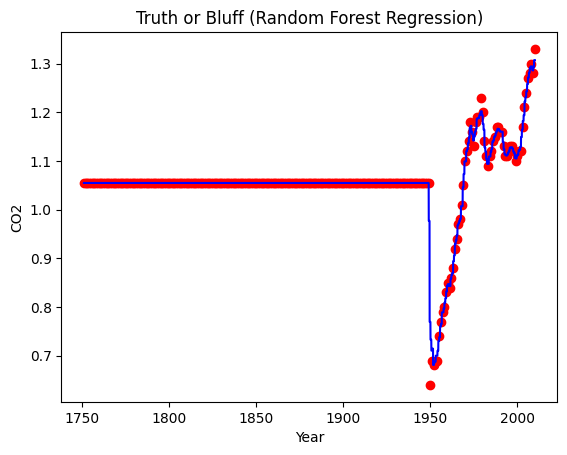

In [20]:
plt.scatter(x, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Year')
plt.ylabel('CO2')
plt.show()

In [21]:
input= 8  #0-15
year= int(x_test[input])
print('test year= ',year)
print('predict :',regressor.predict([[year]]))
print('test val :',y_test[input])
print("Accuracy: ",regressor.score(x_test,y_test)* 100)

test year=  1878
predict : [1.0547541]
test val : 1.0547540983606558
Accuracy:  99.25013124659927


<ipython-input-21-1fa28120fbe0>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  year= int(x_test[input])


In [22]:
print('predict 2010:',regressor.predict([[2010]]))
print('predict 2012:',regressor.predict([[2012]]))
print('predict 2014:',regressor.predict([[2014]]))

predict 2010: [1.307]
predict 2012: [1.307]
predict 2014: [1.307]


Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [24]:
from sklearn import preprocessing
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y_train)
dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dt_classifier.fit(x_train, y_transformed)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

<ipython-input-25-37c40a20a772>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(x_train), max(x_train), 0.01)


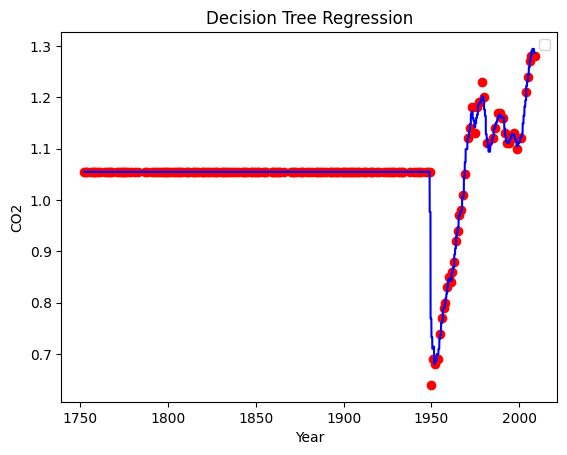

In [25]:
X_grid = np.arange(min(x_train), max(x_train), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x_train,y_train, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.xlabel('Year')
plt.ylabel('CO2')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()

In [26]:
input= 8  #0-15
year= int(x_test[input])
print('test year= ',year)
print('predict :',regressor.predict(np.array([[year]])))
print('test val :',y_test[input])
print("Accuracy: ",regressor.score(x_test,y_test)* 100)

test year=  1878
predict : [1.0547541]
test val : 1.0547540983606558
Accuracy:  99.25013124659927


<ipython-input-26-49a5257f5eab>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  year= int(x_test[input])


In [27]:
print('predict 2010:',regressor.predict(np.array([[2010]])))
print('predict 2012:',regressor.predict(np.array([[2012]])))
print('predict 2014:',regressor.predict(np.array([[2014]])))

predict 2010: [1.307]
predict 2012: [1.307]
predict 2014: [1.307]
